<a href="https://colab.research.google.com/github/setiawansandi/image_recognition/blob/main/mlai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/setiawansandi/image_recognition.git
!mkdir -p saved_model
from tensorflow import keras
from keras.layers import Conv2D, Input, MaxPooling2D,Flatten, Dense, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import sys
import tensorflow as tf 

Cloning into 'image_recognition'...
remote: Enumerating objects: 9562, done.
remote: Counting objects: 100% (1412/1412), done.
remote: Compressing objects: 100% (1351/1351), done.
remote: Total 9562 (delta 89), reused 887 (delta 61), pack-reused 8150
Receiving objects: 100% (9562/9562), 117.78 MiB | 25.12 MiB/s, done.
Resolving deltas: 100% (1134/1134), done.


In [ ]:
batch_size = 64 #64
epoch = 50 #50
img_size = (256, 256)
lr = 1e-5
loss_function = "categorical_crossentropy"
opt = keras.optimizers.Adam(learning_rate=1e-5)
train_dir = '/content/image_recognition/dataset/train'
val_dir = '/content/image_recognition/dataset/valid'
seed = 8734

def model_1():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3, activation='softmax'))
	# compile model
  model.compile(optimizer=opt, loss = loss_function, metrics=['accuracy'])
  return model

def model_2():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3, activation='softmax'))
	# compile model
  model.compile(optimizer=opt, loss = loss_function, metrics=['accuracy'])
  return model

def model_3():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  # dropout regularization (ignore certain nodes (prevent overfitting))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3, activation='softmax')) # 3 classess so the final dense variable must be 3
	# compile model
  model.compile(optimizer=opt, loss = loss_function, metrics=['accuracy'])
  return model

def run_test(option):
  # define model\
  if (option == 1):
    model = model_1()
  elif (option == 2):
    model = model_2()
  else: 
    model = model_3() 
 
  # create image data generators (data augmentation)
  train_datagen = ImageDataGenerator(
      rescale=1.0/255.0, 
      width_shift_range=0.1,
      height_shift_range=0.1,
      rotation_range=30,
      brightness_range=[0.5,1.5], 
      horizontal_flip=True)
 
  val_datagen = ImageDataGenerator(rescale=1.0/255.0)
 
  # start generating
  train_it = train_datagen.flow_from_directory(
      train_dir,
      class_mode='categorical',
      batch_size=batch_size,
      target_size=img_size,
      shuffle=True,
      seed=seed)
 
  val_it = val_datagen.flow_from_directory(
      val_dir,
      class_mode='categorical',
      batch_size=batch_size,
      target_size=img_size)
  
  # fit model (Trains the model for a fixed number of epochs (iterations on a dataset).)
  history = model.fit_generator(train_it, 
                                steps_per_epoch=len(train_it),
                                validation_data=val_it,
                                validation_steps=len(val_it),
                                epochs=epoch,
                                verbose=1)
	# evaluate model
  _, acc = model.evaluate_generator(val_it, steps=len(val_it), verbose=2)
  print('> %.3f' % (acc * 100.0))
	# learning curves
  plot_graph(history)
  return model
 
def plot_graph(history):
  # plot loss
  plt.subplot(121) # shorthand subplot(2, 1, 1) -> row, col, plot.no [211,212]
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='lightskyblue', label='train') #plt(y, fmt)
  plt.plot(history.history['val_loss'], color='lawngreen', label='valid')
  plt.legend(loc='lower right')
  # plot accuracy
  plt.subplot(122)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='lightskyblue', label='train')
  plt.plot(history.history['val_accuracy'], color='lawngreen', label='valid')
  plt.legend(loc='lower right')
  # save plot to file
  filename = sys.argv[0].split('/')[-1]
  plt.savefig(filename + '_plot.png')
  plt.close()

def save_model(model):
  tf.keras.models.save_model(model,'chicken_wings_vs_orange.hdf5')

# entry point, run the test
if __name__ == "__main__":
  model = run_test(3)
  save_model(model)

# upload + live capture
# refine training data
# upload notebook to github
# modify original rock paper scissor

In [ ]:
while True:
  pass

Detection:
Load model

In [3]:
# to signify that the lines after is running bash (or could just put ! at the start of every commands)
%%bash
if ! [[ -f "/content/chicken_wings_vs_orange.hdf5" ]]
then
    echo "No model found. Downloading pre-trained model..."
    wget -cq https://www.dropbox.com/s/g4jtcqtkgkqijee/chicken_wings_vs_orange.hdf5
    echo "Download completed"
else
    echo "Using trained model."
fi

No model found. Downloading pre-trained model...
Download completed


In [ ]:
# loading a trained model
trained_model = tf.keras.models.load_model('/content/chicken_wings_vs_orange.hdf5')

Helper functions

In [10]:
from PIL import Image, ImageOps

# take image + model as arguments and return prediction accuracies
def import_and_predict(image_data, model):
  size = (256,256)    
  image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
  image = image.convert('RGB')
  image = np.asarray(image)
  image = (image.astype(np.float32) / 255.0)

  img_reshape = image[np.newaxis,...]

  prediction = model.predict(img_reshape)

  return prediction

Upload image

In [11]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf 

In [ ]:
uploaded = files.upload()
print('<==========================================================>')

for filename in uploaded.keys():
  image = Image.open(filename) # image for processing
  prediction = import_and_predict(image, trained_model)

  # # display image
  img = mpimg.imread(filename)
  imgplot = plt.imshow(img)
  plt.show()  # show image  

  if np.argmax(prediction) == 0:
      predicted = "chicken wings"
  elif np.argmax(prediction) == 1:
      predicted = "orange"
  else:
      predicted = "unknown"
  print('file: "{name}" is {predict}!'.format(name=filename, predict = predicted))

Saving chick_valid (45).jpg to chick_valid (45).jpg
Saving chick_valid (46).jpg to chick_valid (46).jpg


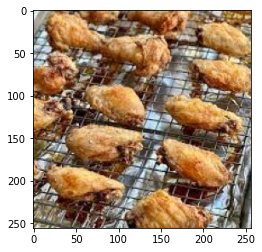

It is unknown
[[8.5016312e-05 2.0993846e-02 9.7892112e-01]]


In [12]:
# uploaded = files.upload()
# filename = next(iter(uploaded)) # get file name

# # display image
# img = mpimg.imread(filename)
# imgplot = plt.imshow(img)
# plt.show()  # show image

# image = Image.open(filename) # image for processing
# prediction = import_and_predict(image, trained_model)
    
# if np.argmax(prediction) == 0:
#     print("It is a chicken wings!")
# elif np.argmax(prediction) == 1:
#     print("It is an orange!")
# else:
#     print("It is unknown")

# print(prediction)


live detection (video)

In [5]:
# import dependencies
from IPython.display import display, Javascript
from PIL import Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
from google.colab.patches import cv2_imshow


In [6]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def overlay_to_bytes(overlay_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  overlay_PIL = PIL.Image.fromarray(overlay_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  overlay_PIL.save(iobuf, format='png')
  # format return string
  overlay_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return overlay_bytes

In [7]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid #724CF9';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this video</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight; 480
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, overlay):
  data = eval_js('stream_frame("{}", "{}")'.format(label, overlay))
  return data
  
# def video_frame(label):
#   data = eval_js('stream_frame("{}")'.format(label))
#   return data

In [9]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
overlay = ''

while True:
    js_reply = video_frame(label_html, overlay)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    original = js_to_image(js_reply["img"])
    frame = cv2.resize(original, (256, 256))

    # capture image to use for prediction
    cv2.imwrite(filename='predict_img.jpg', img=frame)
    predict_image = Image.open('predict_img.jpg')


    # create transparent overlay for bounding box
    overlay_array = np.zeros([480,640,4], dtype=np.uint8)

    # get the prediction's accuracy
    prediction = import_and_predict(predict_image, trained_model)

    if np.argmax(prediction) == 0:
        predict= "Chicken Wings - " + str(f'{prediction.item(0):.3}')
    elif np.argmax(prediction) == 1:
        predict= "Orange - " + str(f'{prediction.item(1):.3}')
    else:
        predict= "Unknown - " + str(f'{prediction.item(2):.3}')
    
    #print(predict)
    overlay_array = cv2.putText(overlay_array, predict, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (114, 76, 249), 2)

    # convert to rgb value (0-255)
    overlay_array[:,:,3] = (overlay_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of text into bytes
    overlay_bytes = overlay_to_bytes(overlay_array)
    # update text so next frame gets new overlay (updated)
    overlay = overlay_bytes


<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

learning rate can be low 10^-3/-4/-5

learning rate = rate at which weights are changed

categorical_crossentropy (for 2 or more classes)

https://www.geeksforgeeks.org/keras-conv2d-class/ conv2d

kernel size(feature map size) e.g img (8x8) -> feature map (6x6) -> max pooling[2,2] calculates the maximum, or largest, value in each patch of each feature map. The results are down sampled or pooled feature maps that highlight the most present feature in the patch,

What is initializer in keras? Initializers define the way to set the initial random weights of Keras layers. The keyword arguments used for passing initializers to layers depends on the layer.

padding one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last". You can use None when a dimension has variable size.

The sigmoid function is used for the two-class logistic regression, whereas the softmax function is used for the multiclass logistic regression

openmax vs softmax

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch. -verbose=0 will show you nothing (silent) -verbose=1 will show you an animated progress bar like this: [================================] -verbose=2 will just mention the number of epoch like this: 1/50

Model fitting is the measure of how well a machine learning model generalizes data similar to that with which it was trained. A good model fit refers to a model that accurately approximates the output when it is provided with unseen inputs. Fitting refers to adjusting the parameters in the model to improve accuracy.

“Dropout” in machine learning refers to the process of randomly ignoring certain nodes in a layer during training. -> https://medium.com/analytics-vidhya/a-simple-introduction-to-dropout-regularization-with-code-5279489dda1e

What is cross-entropy loss used for classification? Cross entropy loss is a metric used to measure how well a classification model in machine learning performs. The loss (or error) is measured as a number between 0 and 1, with 0 being a perfect model. The goal is generally to get your model as close to 0 as possible.

